In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tariffs

In [7]:
tariffs = pd.read_excel('./Tariffs.xlsx')
tariffs.head()

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


In [9]:
tariffs.Tariff.value_counts()

Tariff
Normal    15072
Low        1660
High        788
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import OneHotEncoder
column_to_encode = 'Tariff'
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(tariffs[[column_to_encode]])
encoded_feature_names = encoder.get_feature_names_out([column_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=tariffs.index)
final_tariffs = pd.concat([tariffs.drop(columns=[column_to_encode]), encoded_df], axis=1)
final_tariffs.head()

,TariffDateTime,Tariff_High,Tariff_Low,Tariff_Normal
0,2013-01-01 00:00:00,0.0,0.0,1.0
1,2013-01-01 00:30:00,0.0,0.0,1.0
2,2013-01-01 01:00:00,0.0,0.0,1.0
3,2013-01-01 01:30:00,0.0,0.0,1.0
4,2013-01-01 02:00:00,0.0,0.0,1.0


# LCL Data

In [17]:
data = pd.read_csv('./LCL-June2015v2_0.csv')
data.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [59]:
data["LCLid"].unique()

array(['MAC000002', 'MAC000003', 'MAC000004', 'MAC000006', 'MAC000007',
       'MAC000008', 'MAC000009', 'MAC000010', 'MAC000011', 'MAC000012',
       'MAC000013', 'MAC000016', 'MAC000018', 'MAC000019', 'MAC000020',
       'MAC000021', 'MAC000022', 'MAC000023', 'MAC000024', 'MAC000025',
       'MAC000026', 'MAC000027', 'MAC000028', 'MAC000029', 'MAC000030',
       'MAC000032', 'MAC000033', 'MAC000034', 'MAC000035', 'MAC000036'],
      dtype=object)

In [60]:
data["stdorToU"].unique()

array(['Std'], dtype=object)

In [36]:
data[data.columns[-1]] .replace('Null', np.nan, inplace=True)
data[data.columns[-1]] = data[data.columns[-1]].astype(float)

<Axes: >

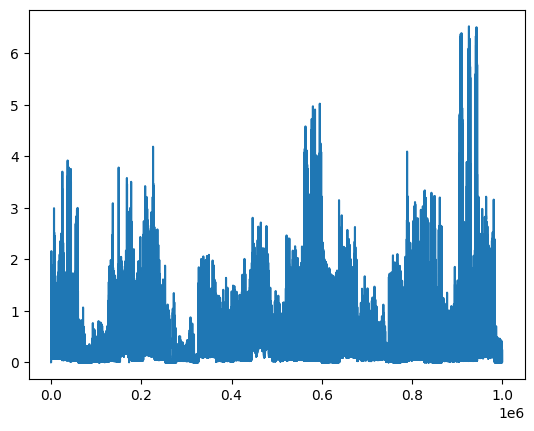

In [37]:
data[data.columns[-1]].plot()

In [47]:
start = tariffs["TariffDateTime"].head(1).values[0]
stop = tariffs["TariffDateTime"].tail(1).values[0]

numpy.datetime64('2013-01-01T00:00:00.000000000')

In [50]:
data["DateTime"] = pd.to_datetime(data['DateTime'], errors='coerce')

In [ ]:
subset = data[(data['DateTime'] >= start) & (data['DateTime'] <= stop)]
subset

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
3840,MAC000002,Std,2013-01-01 00:00:00,0.219
3841,MAC000002,Std,2013-01-01 00:30:00,0.241
3842,MAC000002,Std,2013-01-01 01:00:00,0.191
3843,MAC000002,Std,2013-01-01 01:30:00,0.235
3844,MAC000002,Std,2013-01-01 02:00:00,0.182
...,...,...,...,...
981033,MAC000035,Std,2013-12-31 21:30:00,1.035
981034,MAC000035,Std,2013-12-31 22:00:00,0.728
981035,MAC000035,Std,2013-12-31 22:30:00,0.737
981036,MAC000035,Std,2013-12-31 23:00:00,0.736
